In [3]:
import pandas as pd
import numpy as np
import pylab as pl
import os 
import sys
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import statsmodels.formula.api as smf
%matplotlib inline


In [3]:
#!wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-01.csv

--2017-11-20 16:43:06--  https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-01.csv
Resolving s3.amazonaws.com... 52.216.128.253
Connecting to s3.amazonaws.com|52.216.128.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1985964692 (1.8G) [application/octet-stream]
Saving to: “yellow_tripdata_2015-01.csv”

100%[====================================>] 1,985,964,692 42.5M/s   in 43s     

2017-11-20 16:43:50 (43.7 MB/s) - “yellow_tripdata_2015-01.csv” saved [1985964692/1985964692]



In [65]:
#!wget https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-01.csv

--2017-11-26 19:50:45--  https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-01.csv
Resolving s3.amazonaws.com... 52.216.16.91
Connecting to s3.amazonaws.com|52.216.16.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243307680 (232M) [application/octet-stream]
Saving to: “green_tripdata_2015-01.csv”

100%[======================================>] 243,307,680 51.9M/s   in 4.5s    

2017-11-26 19:50:49 (51.8 MB/s) - “green_tripdata_2015-01.csv” saved [243307680/243307680]



In [48]:
#!wget https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-01.csv

--2017-11-20 19:06:05--  https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-01.csv
Resolving s3.amazonaws.com... 52.216.97.237
Connecting to s3.amazonaws.com|52.216.97.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85733063 (82M) [text/csv]
Saving to: “fhv_tripdata_2015-01.csv”

100%[======================================>] 85,733,063  46.0M/s   in 1.8s    

2017-11-20 19:06:07 (46.0 MB/s) - “fhv_tripdata_2015-01.csv” saved [85733063/85733063]



In [26]:
#!wget https://s3.amazonaws.com/nyc-tlc/misc/taxi_zones.zip

--2017-11-26 18:27:20--  https://s3.amazonaws.com/nyc-tlc/misc/taxi_zones.zip
Resolving s3.amazonaws.com... 52.216.229.133
Connecting to s3.amazonaws.com|52.216.229.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1025147 (1001K) [application/zip]
Saving to: “taxi_zones.zip”

100%[======================================>] 1,025,147   3.38M/s   in 0.3s    

2017-11-26 18:27:21 (3.38 MB/s) - “taxi_zones.zip” saved [1025147/1025147]



In [27]:
!mv taxi_zones.zip data

In [33]:
!unzip data/taxi_zones.zip -d data

Archive:  data/taxi_zones.zip
  inflating: data/taxi_zones.prj     
  inflating: data/taxi_zones.dbf     
  inflating: data/taxi_zones.shp     
  inflating: data/taxi_zones.shp.xml  
  inflating: data/taxi_zones.shx     
  inflating: data/taxi_zones.sbn     
  inflating: data/taxi_zones.sbx     


In [5]:
#!mv yellow_tripdata_2015-01.csv data

In [66]:
#!mv green_tripdata_2015-01.csv data

In [50]:
#!mv fhv_tripdata_2015-01.csv data

## loading the datasets

In [3]:
taxi_data = pd.read_csv("data/yellow_tripdata_201-01.csv")

In [89]:
fhv_data = pd.read_csv("data/fhv_tripdata_2015-01.csv")

IOError: File data/fhv_tripdata_2016-01.csv does not exist

In [5]:
green_data = pd.read_csv("data/green_tripdata_2015-01.csv").reset_index()

In [6]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


In [7]:
fhv_data.head()

,Dispatching_base_num,Pickup_date,locationID
0,B00013,2015-01-01 00:30:00,NaN
1,B00013,2015-01-01 01:22:00,NaN
2,B00013,2015-01-01 01:23:00,NaN
3,B00013,2015-01-01 01:44:00,NaN
4,B00013,2015-01-01 02:00:00,NaN


In [91]:
green_2016.head()

VendorID lpep_pickup_datetime  \
2 2015-01-01 00:34:42  2015-01-01 00:38:34                    N   
  2015-01-01 00:34:46  2015-01-01 00:47:23                    N   
1 2015-01-01 00:34:44  2015-01-01 00:38:15                    N   
2 2015-01-01 00:34:48  2015-01-01 00:38:08                    N   
  2015-01-01 00:34:53  2015-01-01 01:09:10                    N   

                       Lpep_dropoff_datetime  Store_and_fwd_flag  RateCodeID  \
2 2015-01-01 00:34:42                      1          -73.922592   40.754528   
  2015-01-01 00:34:46                      1          -73.952751   40.677711   
1 2015-01-01 00:34:44                      1          -73.843010   40.719055   
2 2015-01-01 00:34:48                      1          -73.860825   40.757793   
  2015-01-01 00:34:53                      1          -73.945183   40.783321   

                       Pickup_longitude  Pickup_latitude  Dropoff_longitude  \
2 2015-01-01 00:34:42        -73.913635        40.765522                  1   
  2015-01-01 00:34:46        -73.981529        40.658978                  1   
1 2015-01-01 00:34:44        -73.846581        40.711567                  1   
2 2015-01-01 00:34:48        -73.854042        40.749821                  1   
  2015-01-01 00:34:53        -73.989624        40.765450                  1   

                       Dropoff_latitude  Passenger_count     ...      \
2 2015-01-01 00:34:42              0.88              5.0     ...       
  2015-01-01 00:34:46              3.08             12.0     ...       
1 2015-01-01 00:34:44              0.90              5.0     ...       
2 2015-01-01 00:34:48              0.85              5.0     ...       
  2015-01-01 00:34:53              4.91             24.5     ...       

                       Fare_amount  Extra  MTA_tax  Tip_amount  Tolls_amount  \
2 2015-01-01 00:34:42          0.5    0.0      0.0         NaN           0.3   
  2015-01-01 00:34:46          0.5    0.0      0.0         NaN           0.3   
1 2015-01-01 00:34:44          0.5    1.8      0.0         NaN           0.0   
2 2015-01-01 00:34:48          0.5    0.0      0.0         NaN           0.3   
  2015-01-01 00:34:53          0.5    0.0      0.0         NaN           0.3   

                       Ehail_fee  improvement_surcharge  Total_amount  \
2 2015-01-01 00:34:42        6.3                      2           1.0   
  2015-01-01 00:34:46       13.3                      2           1.0   
1 2015-01-01 00:34:44        7.8                      1           1.0   
2 2015-01-01 00:34:48        6.3                      2           1.0   
  2015-01-01 00:34:53       25.8                      2           1.0   

                       Payment_type  Trip_type   
2 2015-01-01 00:34:42           NaN         NaN  
  2015-01-01 00:34:46           NaN         NaN  
1 2015-01-01 00:34:44           NaN         NaN  
2 2015-01-01 00:34:48           NaN         NaN  
  2015-01-01 00:34:53           NaN         NaN  

[5 rows x 21 columns]

In [112]:
#columns = green_data.columns[2:]
#green_data = green_data.drop(['Payment_type','Trip_type '], axis=1)
#green_data.columns = columns
#green_data.head()

green_data = green_2016.reset_index()
columns = green_data.columns[2:]
green_data = green_data.drop(['Payment_type','Trip_type '], axis=1)
green_data.columns = columns
green_data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-01-01 00:34:42,2015-01-01 00:38:34,N,1,-73.922592,40.754528,-73.913635,40.765522,1,...,5.0,0.5,0.5,0.0,0.0,NaN,0.3,6.3,2,1.0
1,2,2015-01-01 00:34:46,2015-01-01 00:47:23,N,1,-73.952751,40.677711,-73.981529,40.658978,1,...,12.0,0.5,0.5,0.0,0.0,NaN,0.3,13.3,2,1.0
2,1,2015-01-01 00:34:44,2015-01-01 00:38:15,N,1,-73.843010,40.719055,-73.846581,40.711567,1,...,5.0,0.5,0.5,1.8,0.0,NaN,0.0,7.8,1,1.0
3,2,2015-01-01 00:34:48,2015-01-01 00:38:08,N,1,-73.860825,40.757793,-73.854042,40.749821,1,...,5.0,0.5,0.5,0.0,0.0,NaN,0.3,6.3,2,1.0
4,2,2015-01-01 00:34:53,2015-01-01 01:09:10,N,1,-73.945183,40.783321,-73.989624,40.765450,1,...,24.5,0.5,0.5,0.0,0.0,NaN,0.3,25.8,2,1.0


## get_times makes a day, hour tuple

In [97]:
def get_times(data):
    x, y = data
    return (x, y)

In [113]:
taxi_data = yellow_2016
taxi_data.tpep_pickup_datetime = pd.to_datetime(taxi_data.tpep_pickup_datetime)
green_data.lpep_pickup_datetime = pd.to_datetime(green_data.lpep_pickup_datetime)

In [114]:
taxi_data['day'] = taxi_data.tpep_pickup_datetime.dt.day
taxi_data['hour'] = taxi_data.tpep_pickup_datetime.dt.hour
taxi_data['DAY_HOUR'] = taxi_data[['day', 'hour']].apply(get_times, axis=1)

In [115]:
green_data['day'] = green_data.lpep_pickup_datetime.dt.day
green_data['hour'] = green_data.lpep_pickup_datetime.dt.hour
green_data['DAY_HOUR'] = green_data[['day', 'hour']].apply(get_times, axis=1)

## Making the geometry to find the taxi_zones

In [116]:
crs = {'init':'epsg:4326'}

In [117]:
geometry = [Point(xy) for xy in zip(green_data.Pickup_longitude, green_data.Pickup_latitude)]
green_df = GeoDataFrame(green_data, crs=crs, geometry=geometry)

In [118]:
geometry = [Point(xy) for xy in zip(taxi_data.pickup_longitude, taxi_data.pickup_latitude)]
yellow_df = GeoDataFrame(taxi_data, crs=crs, geometry=geometry)

In [16]:
green_df[['VendorID','lpep_pickup_datetime','day', 'hour', 'DAY_HOUR','geometry']]
yellow_df[['VendorID','tpep_pickup_datetime','day', 'hour', 'DAY_HOUR','geometry']]

,VendorID,tpep_pickup_datetime,day,hour,DAY_HOUR,geometry
0,2,2015-01-15 19:05:39,15,19,"(15, 19)",POINT (-73.993896484375 40.7501106262207)
1,1,2015-01-10 20:33:38,10,20,"(10, 20)",POINT (-74.00164794921875 40.7242431640625)
2,1,2015-01-10 20:33:38,10,20,"(10, 20)",POINT (-73.96334075927734 40.80278778076172)
3,1,2015-01-10 20:33:39,10,20,"(10, 20)",POINT (-74.00908660888672 40.71381759643555)
4,1,2015-01-10 20:33:39,10,20,"(10, 20)",POINT (-73.97117614746094 40.76242828369141)
5,1,2015-01-10 20:33:39,10,20,"(10, 20)",POINT (-73.87437438964845 40.7740478515625)
6,1,2015-01-10 20:33:39,10,20,"(10, 20)",POINT (-73.9832763671875 40.72600936889648)
7,1,2015-01-10 20:33:39,10,20,"(10, 20)",POINT (-74.00266265869139 40.7341423034668)
8,1,2015-01-10 20:33:39,10,20,"(10, 20)",POINT (-73.78304290771484 40.64435577392577)
9,1,2015-01-10 20:33:40,10,20,"(10, 20)",POINT (-73.98558807373048 40.76794815063477)


In [ ]:
#green_df.rename(columns={'Rename'})

In [119]:
weather_data = pd.read_csv("data/1106040.csv")

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14,15,20,23,25,40,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [120]:
fhv_sub = fhv_data[fhv_data.locationID.isnull() == False]

## Changing the dates to a datetime object

In [121]:
fhv_sub.Pickup_date = pd.to_datetime(fhv_sub.Pickup_date)


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [122]:
fhv_sub['day'] = fhv_sub.Pickup_date.dt.day
fhv_sub['hour'] = fhv_sub.Pickup_date.dt.hour
fhv_sub['DAY_HOUR'] = fhv_sub[['day', 'hour']].apply(get_times, axis=1)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [123]:
taxi_zones = gpd.read_file("data/taxi_zones.shp")

In [22]:
taxi_zones.crs

{u'datum': u'NAD83',
 u'lat_0': 40.16666666666666,
 u'lat_1': 40.66666666666666,
 u'lat_2': 41.03333333333333,
 u'lon_0': -74,
 u'no_defs': True,
 u'proj': u'lcc',
 u'units': u'us-ft',
 u'x_0': 300000,
 u'y_0': 0}

In [124]:
taxi_zones = taxi_zones.to_crs(epsg=2263)

In [125]:
green_df =  green_df.to_crs(epsg=2263)

In [126]:
yellow_df_sub = yellow_df.sample(1000000)

In [127]:
yellow_df_sub = yellow_df_sub.to_crs(epsg=2263)

In [128]:
green_df = green_df.rename(columns={'lpep_pickup_datetime': 'Pickup_date'})
yellow_df_sub = yellow_df.rename(columns={'tpep_pickup_datetime': 'Pickup_date'})
green_df = green_df[['VendorID','Pickup_date','day', 'hour', 'DAY_HOUR','geometry']]
yellow_df_sub = yellow_df_sub[['VendorID','Pickup_date','day', 'hour', 'DAY_HOUR','geometry']]

In [129]:
green_df['type'] = 'green'

In [130]:
yellow_df_sub['type'] = 'yellow'

In [132]:
fhv_sub['type'] = 'fhv'

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [37]:
#green_df[['Dispatching_base_num','lpep_pickup_datetime','day', 'hour', 'DAY_HOUR','geometry']]

In [131]:
merged_taxis = green_df.append(yellow_df_sub)

In [133]:
taxi_with_zones = gpd.sjoin(merged_taxis, taxi_zones)

In [134]:
taxi_with_zones.head()

,VendorID,Pickup_date,day,hour,DAY_HOUR,geometry,type,index_right,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,2,2015-01-01 00:34:42,1,0,"(1, 0)",POINT (1005696.150913268 214181.0758290828),green,6,7,0.107417,0.00039,Astoria,7,Queens
8,2,2015-01-01 00:35:13,1,0,"(1, 0)",POINT (1007206.027477717 217957.2073006125),green,6,7,0.107417,0.00039,Astoria,7,Queens
9,2,2015-01-01 00:35:09,1,0,"(1, 0)",POINT (1006021.928419686 218603.7725072576),green,6,7,0.107417,0.00039,Astoria,7,Queens
16,2,2015-01-01 00:35:29,1,0,"(1, 0)",POINT (1008950.267569086 219382.0970629308),green,6,7,0.107417,0.00039,Astoria,7,Queens
46,2,2015-01-01 00:35:13,1,0,"(1, 0)",POINT (1004894.842770228 216894.69798633),green,6,7,0.107417,0.00039,Astoria,7,Queens


In [67]:
taxi_with_zones.columns

Index([u'Dispatching_base_num', u'Pickup_date', u'locationID', u'day', u'hour',
       u'DAY_HOUR'],
      dtype='object')

In [135]:
taxi_with_zones['Dispatching_base_num'] = np.nan
taxi_with_zones = taxi_with_zones.rename(columns={'LocationID': 'locationID'})

In [138]:
taxi_with_zones = taxi_with_zones[['Dispatching_base_num','Pickup_date', 'locationID', 'day', 'hour', 'DAY_HOUR', 'type']]

In [139]:
all_trips = taxi_with_zones.append(fhv_sub)

In [55]:
#all_trips.to_csv("all_trips.csv")

In [137]:
taxi_zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
index_right,,,,,,,
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527121 192536.0857092953,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,(POLYGON ((1033269.243591295 172126.0078245941...
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506665 256767.6975524619,..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968614 203714.0760008526,..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932597 144283.3358627402,..."


In [140]:
weather_data.Date = pd.to_datetime(weather_data.DATE)

In [141]:
weather_subdata = weather_data[weather_data.Date.dt.month == 1]

In [142]:
weather_subdata.DATE =  pd.to_datetime(weather_subdata.DATE)

In [143]:
weather_subdata['day'] = weather_subdata.DATE.dt.day
weather_subdata['hour'] = weather_subdata.DATE.dt.hour

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [144]:
weather_subdata['DAY_HOUR'] = weather_subdata[['day','hour']].apply(get_times, axis=1)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
weather_subdata['DAY_HOUR'].head()

8789    (1, 0)
8790    (1, 1)
8791    (1, 2)
8792    (1, 3)
8793    (1, 4)
Name: DAY_HOUR, dtype: object

In [18]:
#merged_taxi = taxi_data.merge(weather_subdata, left_on='DAY_HOUR', right_on='DAY_HOUR')

NameError: name 'taxi_data' is not defined

In [19]:
#merged_taxi.shape

NameError: name 'merged_taxi' is not defined

In [25]:
weather_subdata.columns

Index([u'STATION', u'STATION_NAME', u'ELEVATION', u'LATITUDE', u'LONGITUDE',
       u'DATE', u'REPORTTPYE', u'HOURLYSKYCONDITIONS', u'HOURLYVISIBILITY',
       u'HOURLYPRSENTWEATHERTYPE', u'HOURLYDRYBULBTEMPF',
       u'HOURLYDRYBULBTEMPC', u'HOURLYWETBULBTEMPF', u'HOURLYWETBULBTEMPC',
       u'HOURLYDewPointTempF', u'HOURLYDewPointTempC',
       u'HOURLYRelativeHumidity', u'HOURLYWindSpeed', u'HOURLYWindDirection',
       u'HOURLYWindGustSpeed', u'HOURLYStationPressure',
       u'HOURLYPressureTendency', u'HOURLYPressureChange',
       u'HOURLYSeaLevelPressure', u'HOURLYPrecip', u'HOURLYAltimeterSetting',
       u'DAILYMaximumDryBulbTemp', u'DAILYMinimumDryBulbTemp',
       u'DAILYAverageDryBulbTemp', u'DAILYDeptFromNormalAverageTemp',
       u'DAILYAverageRelativeHumidity', u'DAILYAverageDewPointTemp',
       u'DAILYAverageWetBulbTemp', u'DAILYHeatingDegreeDays',
       u'DAILYCoolingDegreeDays', u'DAILYSunrise', u'DAILYSunset',
       u'DAILYWeather', u'DAILYPrecip', u'DAILYSnowfall

In [43]:
#merged_taxi[['tpep_pickup_datetime','DATE']].head()

,tpep_pickup_datetime,DATE
0,2015-01-15 19:05:39,2015-01-15 19:51:00
1,2015-01-15 19:05:39,2015-01-15 19:51:00
2,2015-01-15 19:05:40,2015-01-15 19:51:00
3,2015-01-15 19:05:40,2015-01-15 19:51:00
4,2015-01-15 19:05:41,2015-01-15 19:51:00


In [145]:
trips_weather = all_trips.merge(weather_subdata, left_on='DAY_HOUR', right_on='DAY_HOUR')

In [60]:
trips_weather.head()

,Dispatching_base_num,Pickup_date,locationID,day_x,hour_x,DAY_HOUR,STATION,STATION_NAME,ELEVATION,LATITUDE,...,MonthlyMinSeaLevelPressureDate,MonthlyMinSeaLevelPressureTime,MonthlyTotalHeatingDegreeDays,MonthlyTotalCoolingDegreeDays,MonthlyDeptFromNormalHeatingDD,MonthlyDeptFromNormalCoolingDD,MonthlyTotalSeasonToDateHeatingDD,MonthlyTotalSeasonToDateCoolingDD,day_y,hour_y
0,NaN,2015-01-01 00:34:42,7.0,1,0,"(1, 0)",WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,NaN,2015-01-01 00:35:13,7.0,1,0,"(1, 0)",WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,NaN,2015-01-01 00:35:09,7.0,1,0,"(1, 0)",WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,NaN,2015-01-01 00:35:29,7.0,1,0,"(1, 0)",WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,NaN,2015-01-01 00:35:13,7.0,1,0,"(1, 0)",WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [146]:
#trips_weather.to_csv('trips_weather16.csv')

In [147]:
#merged_fhv.head(20)

In [62]:
taxi_zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
index_right,,,,,,,
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527121 192536.0857092953,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,(POLYGON ((1033269.243591295 172126.0078245941...
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506665 256767.6975524619,..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968614 203714.0760008526,..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932597 144283.3358627402,..."


In [48]:
#fhv_sub.locationID = fhv_sub.locationID.astype(int)

In [51]:
#fhv_locs = taxi_zones.merge(fhv_sub, left_on='LocationID', right_on='locationID')

In [59]:
#fhv_all = fhv_locs.merge(weather_subdata, left_on='DAY_HOUR', right_on='DAY_HOUR')

In [59]:
taxi_weather = pd.read_csv('trips_weather.csv')

In [61]:
temp = taxi_weather.groupby(('DAY_HOUR','locationID'))['DATE'].count().reset_index()
temp.rename(columns={'DATE':'COUNTS'},inplace=True)
temp.head()

taxi_weather = pd.merge(taxi_weather,temp,on=('DAY_HOUR','locationID'))

In [148]:
temp = trips_weather.groupby(('DAY_HOUR','locationID'))['DATE'].count().reset_index()
temp.rename(columns={'DATE':'COUNTS'},inplace=True)
temp.head()

trips_weather = pd.merge(trips_weather,temp,on=('DAY_HOUR','locationID'))

In [62]:
taxi_weather = taxi_weather[taxi_weather.HOURLYPrecip != 'T']

In [150]:
trips_weather = trips_weather[trips_weather.HOURLYPrecip != 'T']

In [63]:
taxi_weather.HOURLYPrecip = taxi_weather.HOURLYPrecip.astype(float)

In [151]:
trips_weather.HOURLYPrecip = trips_weather.HOURLYPrecip.astype(float)

In [64]:
taxi_weather = taxi_weather.dropna(subset=['HOURLYDRYBULBTEMPF', 'HOURLYWindSpeed','HOURLYPrecip'])

In [152]:
trips_weather = trips_weather.dropna(subset=['HOURLYDRYBULBTEMPF', 'HOURLYWindSpeed','HOURLYPrecip'])

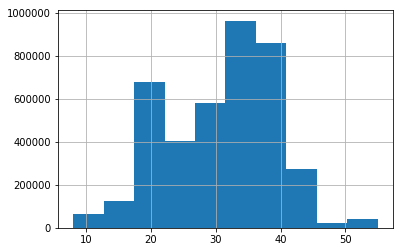

In [65]:
taxi_weather.HOURLYDRYBULBTEMPF.hist()

In [66]:
taxi_weather.DATE = pd.to_datetime(taxi_weather.DATE)


In [153]:
trips_weather.DATE = pd.to_datetime(trips_weather.DATE)


In [67]:
def weekendfilter(record):
    if record == 5 or record == 6:
        return 1
    else:
        return 0
def rush_hourfilter(record):
    if record in [7.0,8.0,9.0,16.0,17.0,18.0]:
        return 1
    else:
        return 0

In [68]:
taxi_weather["Weekend"] = taxi_weather.DATE.dt.dayofweek.apply(weekendfilter)
taxi_weather["Rush_Hour"] = taxi_weather.DATE.dt.hour.apply(rush_hourfilter)
taxi_weather["DoW"] = taxi_weather.DATE.dt.dayofweek




In [154]:
trips_weather["Weekend"] = trips_weather.DATE.dt.dayofweek.apply(weekendfilter)
trips_weather["Rush_Hour"] = trips_weather.DATE.dt.hour.apply(rush_hourfilter)
trips_weather["DoW"] = trips_weather.DATE.dt.dayofweek


In [155]:
#mean = taxi_weather.HOURLYDRYBULBTEMPF.mean()
#std = taxi_weather.HOURLYDRYBULBTEMPF.std()
mean = trips_weather.HOURLYDRYBULBTEMPF.mean()
std = trips_weather.HOURLYDRYBULBTEMPF.std()
def stdfilter(record):
    if record < mean - std:
        return 1
    elif record > mean + std:
        return 3
    else:
        return 2

In [80]:
taxi_weather["TempBuckets"] = taxi_weather.HOURLYDRYBULBTEMPF.apply(stdfilter)

In [156]:
trips_weather["TempBuckets"] = trips_weather.HOURLYDRYBULBTEMPF.apply(stdfilter)

In [157]:
#trips_weather.to_csv('trips_jan16')

In [161]:
def make_type(x):
    if x == 'yellow':
        return 0
    elif x == 'green':
        return 1
    else:
        return 2

In [162]:
trips_weather['type2'] = trips_weather.type.apply(make_type)

In [81]:
y = taxi_weather.COUNTS
X = pd.concat((pd.get_dummies(taxi_weather.DoW, columns=['Mon','Tues', 'Wed','Thur','Fri','Sat','Sun']),
               taxi_weather.HOURLYPrecip, pd.get_dummies(taxi_weather.locationID), 
               pd.get_dummies(taxi_weather.hour_x), taxi_weather.HOURLYWindSpeed, 
               pd.get_dummies(taxi_weather.TempBuckets)), axis=1)

In [163]:
y = trips_weather.COUNTS
X = pd.concat((pd.get_dummies(trips_weather.DoW, columns=['Mon','Tues', 'Wed','Thur','Fri','Sat','Sun']),
               trips_weather.HOURLYPrecip, pd.get_dummies(trips_weather.locationID), 
               pd.get_dummies(trips_weather.hour_x), trips_weather.HOURLYWindSpeed, 
               pd.get_dummies(trips_weather.TempBuckets), pd.get_dummies(trips_weather.type2)), axis=1)

In [164]:
lm = smf.OLS(y, X).fit()

In [165]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 COUNTS   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     9947.
Date:                Fri, 08 Dec 2017   Prob (F-statistic):               0.00
Time:                        01:38:53   Log-Likelihood:            -2.5815e+07
No. Observations:             4014424   AIC:                         5.163e+07
Df Residuals:                 4014128   BIC:                         5.163e+07
Df Model:                         295                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
0                5.885e+11   5.94e+11      0.990      0.322     -5.76e+11  1.75e+12
1                5.885e+11   5.94e+11      0.990      0.322     -5.76e+11  1.75e+12
2                5.885e+11   5.94e+11      0.990      0.322     -5.76e+11  1.75e+12
3                5.885e+11   5.94e+11      0.990      0.322     -5.76e+11  1.75e+12
4                5.885e+11   5.94e+11      0.990      0.322     -5.76e+11  1.75e+12
5                5.885e+11   5.94e+11      0.990      0.322     -5.76e+11  1.75e+12
6                5.885e+11   5.94e+11      0.990      0.322     -5.76e+11  1.75e+12
HOURLYPrecip     1389.7567      3.020    460.142      0.000      1383.837  1395.676
1.0              -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
2.0              -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
3.0              -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
4.0              -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
5.0              -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
6.0              -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
7.0              -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
8.0              -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
9.0              -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
10.0             -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
11.0             -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
12.0             -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
13.0             -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
14.0             -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
15.0             -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
16.0             -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
17.0             -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
18.0             -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
19.0             -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
20.0             -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
21.0             -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
22.0             -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
23.0             -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
24.0             -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
25.0             -2.65e+11      4e+11     -0.663      0.507     -1.05e+12  5.19e+11
26.0             -2.65e+11      4e+11     -0.663      0.507

In [84]:
from sklearn.cross_validation import train_test_split

In [87]:
yellow_2016 = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-01.csv')

In [88]:
green_2016 = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-01.csv')

In [90]:
fhv_data = pd.read_csv("https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-01.csv")